# P2: Investigate a dataset by Junsik Whang (Baseball)

### Q1. How did the pitchers' records change over time?

In [325]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [326]:
pitcher_df = pd.read_csv("/Users/jun/desktop/python/udacity_baseball/dataset/Pitching.csv")

In [327]:
pitcher_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [328]:
stats = pitcher_df.columns[5:].tolist()
stats2 = stats[0:3]

In [329]:
# I've run the following code to briefly find out some interesting points about pitchers..
# for i in stats:
#     pitcher_df.groupby('yearID', as_index=False)[i].mean().plot(x='yearID', figsize=(20,2))
#     plt.show()

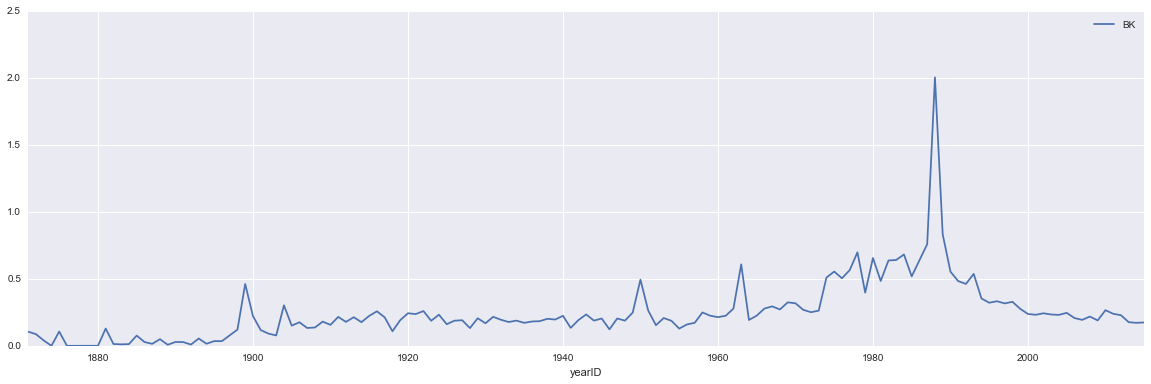

In [330]:
# then I found a strange peak in BK(Balks) 1998:
pitcher_df.groupby('yearID', as_index=False)['BK'].mean().plot(x='yearID', figsize=(20,6))

In [331]:
# according to Wikipedia, a pitcher commits a balk when he pretends to pitch but not throws a ball.
# from the chart, we can see that, on average a pitcher would violate less than a single balk per season.
# but what an earth happened in 1988 when the average balk violation per pitcher went up to nearly 2.0??
# being curious about this strange pattern, I decided to dive deeper in 1988.

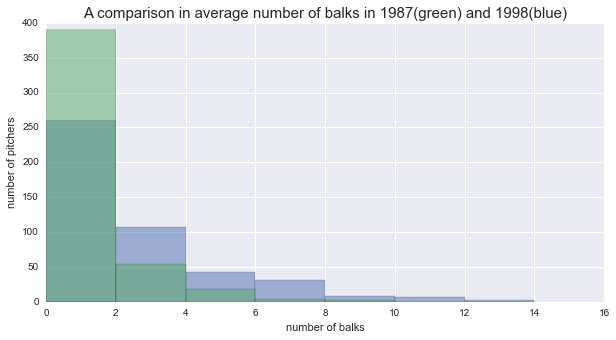

In [332]:
pitcher_df[pitcher_df.yearID == 1988].BK.hist(bins=np.arange(0,16,2), alpha=0.5, figsize=(10,5))
pitcher_df[pitcher_df.yearID == 1987].BK.hist(bins=np.arange(0,16,2), alpha=0.5, figsize=(10,5))
plt.xlim(0,16)
plt.title("A comparison in average number of balks in 1987(green) and 1998(blue)", size=15)
plt.ylabel('number of pitchers')
plt.xlabel('number of balks')
plt.show()

In [333]:
# wow. something really did happen in 1988! So I moved onto google and searched 'major league balks 1988'.
# and google gave me a link to this website: http://reconditebaseball.blogspot.kr/2008/08/balks-story-of-1988-major-league.html
# the name of the blog post: The Story of the 1988 Major League Baseball Season! This sounds something special!

# a fascinating excerpt from the webpage:
# The difference between the two rules is that the 1988 version replaced “complete stop” with “single complete 
# and discernible stop, with both feet on the ground.” This slight change, intended to make balk calls more 
# uniform throughout major league baseball, instead sparked one of most frustrating summers ever for major 
# league hurlers. Only six weeks after opening day, Rick Mahler of the Atlanta Braves committed the 357th 
# balk of the 1988 season, breaking the MLB record for most balks in a complete season…with three-quarters 
# of the season to play.

# wow.

### Q2. In the year of 2016, MLB has seen more South Korean baseball players than ever before (I think). How has its nationality diversity change overtime?

In [334]:
pitcher_df.head()

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [335]:
batter_df = pd.read_csv("../dataset/Batting.csv")

In [336]:
batter_df.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13,8,1,4,0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19,3,1,2,5,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27,1,1,0,2,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16,6,2,2,1,NaN,NaN,NaN,NaN,NaN


In [337]:
## merging two dfs into one with playerID and yearID

In [338]:
players_df = pitcher_df[['playerID','yearID']].append(batter_df[['playerID','yearID']])

In [339]:
## merging with master.csv to figure out where they come from.

In [340]:
master_df = pd.read_csv('../dataset/master.csv')

In [341]:
master_df.columns

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')

In [342]:
master_df.head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981,12,27,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220,75,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934,2,5,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180,72,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939,8,5,USA,AL,Mobile,1984,8,16,...,Aaron,Tommie Lee,190,75,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954,9,8,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190,75,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972,8,25,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184,73,L,L,2001-09-10,2006-04-13,abada001,abadan01


In [343]:
players_nat_df = players_df.merge(master_df, on="playerID", how='left')[['playerID','yearID','birthCountry']]

In [344]:
players_nat_df.head()

,playerID,yearID,birthCountry
0,bechtge01,1871,USA
1,brainas01,1871,USA
2,fergubo01,1871,USA
3,fishech01,1871,USA
4,fleetfr01,1871,USA


In [345]:
nat_result = players_nat_df.groupby(['yearID','birthCountry'], as_index=False).playerID.count()

In [346]:
nat_result.head()

,yearID,birthCountry,playerID
0,1871,CAN,1
1,1871,Cuba,1
2,1871,Germany,1
3,1871,Ireland,4
4,1871,Netherlands,2


In [347]:
def ratio_calc(s):
    total = s.sum()
    return s / total

In [348]:
nat_result['ratio'] = nat_result.groupby('yearID')['playerID'].apply(ratio_calc)

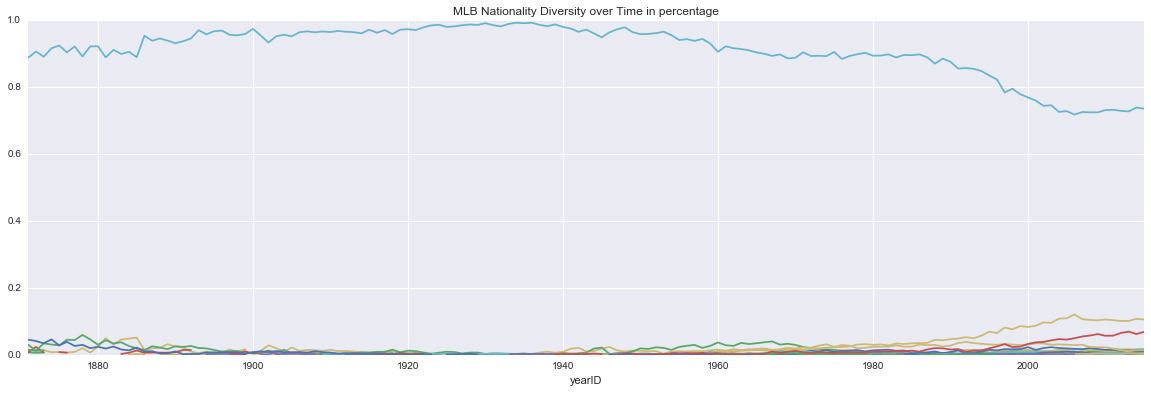

In [349]:
#had to make the legend invisible as there were quite a lot of countries.
nat_result.pivot_table(index='yearID', columns='birthCountry', values='ratio').plot(figsize=(20,6))
plt.legend().set_visible(False)
plt.title('MLB Nationality Diversity over Time in percentage')
plt.show()

In [350]:
# the percentage of USA players starts to decline since 1940.. and gradually comes down to 80% by the end of 90s.
# and as of 2015, the percentage of USA players is about 76%.

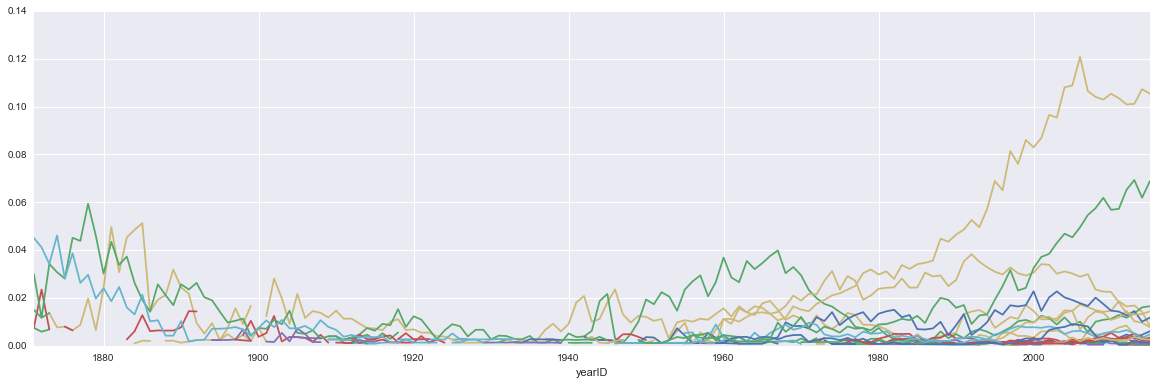

In [351]:
#let's rule out USA to have a look at other countries.
nat_result_wo_usa = nat_result[nat_result.birthCountry != 'USA']
nat_result_wo_usa.pivot_table(index='yearID', columns='birthCountry', values='ratio').plot(figsize=(20,6))
plt.legend().set_visible(False)

In [352]:
# let's pick top ten most frequent countries in 2015, and see their records.

In [353]:
top10 = nat_result_wo_usa[nat_result_wo_usa.yearID == 2015].groupby('birthCountry').playerID.sum().sort_values(ascending=False).nlargest(10)
top10

birthCountry
D.R.         242
Venezuela    158
Cuba          38
P.R.          33
Mexico        27
CAN           19
Japan         18
Colombia      14
Panama        11
Nicaragua      8
Name: playerID, dtype: int64

In [354]:
top10_list = top10.index.tolist()

In [355]:
def in_top10(nat):
    if nat in top10_list:
        return True
    else:
        return False

In [356]:
nat_result['top10'] = nat_result.birthCountry.apply(lambda x: in_top10(x))
nat_result.head()

,yearID,birthCountry,playerID,ratio,top10
0,1871,CAN,1,0.007519,True
1,1871,Cuba,1,0.007519,True
2,1871,Germany,1,0.007519,False
3,1871,Ireland,4,0.030075,False
4,1871,Netherlands,2,0.015038,False


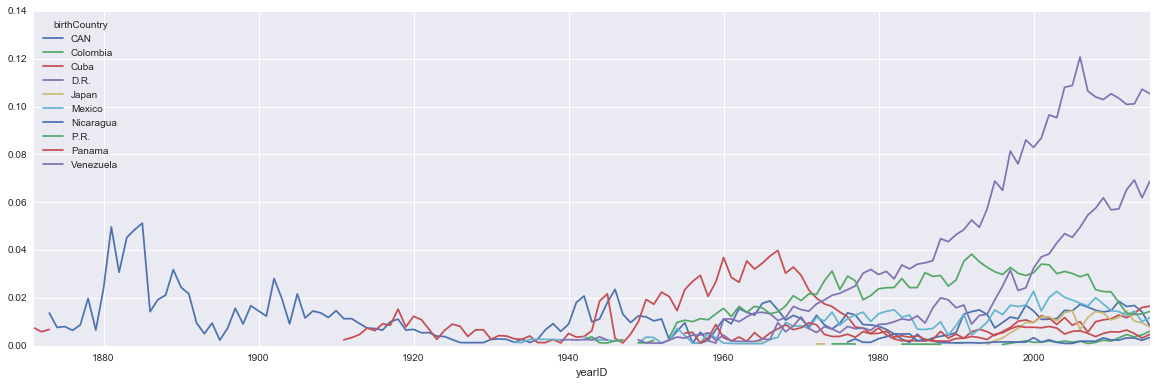

In [357]:
nat_result[nat_result.top10].pivot_table(index='yearID', columns='birthCountry', values='ratio').plot(figsize=(20,6))
# plt.legend().set_visible(False)

In [358]:
# wow. yet another interesting chart! There was an influx of Cuban players from 1950 to 1970, but then from 1980
# the percentage of Cuban players go down. Guess this is due to some uncomfortable diplomatic issues between two
# countries.. or the players might have migrated to USA. And we can see a lot of baseball players in MLB from 
# D.R. (Dominican Republic and Venezuela). P.R. (Puerto Rico) shows an interesting flow: its percentage was booming
# in 90s (2nd place) but then it gradually decreases after 2000, eventually comes down to the similar level to
# Japan and Mexico. Wonder what happened there.

### Q3. There has been a few Korean baseball players in MLB. In their golden and glorious days in the states, how good were they compared to the average MLB players?

In [359]:
players_nat_df = players_df.merge(master_df, on="playerID", how='left')[['playerID','yearID','birthCountry', 'nameFirst', 'nameLast']]
players_nat_df['fullname'] = players_nat_df.nameFirst + " " + players_nat_df.nameLast

In [360]:
# some of the names sound too foreign to be Korean, so checked their fullname. Tommy Phelps and Rob Refsnyder.
# not quite sure about Tommy, but Rob is Korean-American.
players_nat_df[players_nat_df.birthCountry == 'South Korea'].fullname.unique().tolist()

['Chan Ho Park',
 'Jin Ho Cho',
 'Byung-Hyun Kim',
 'Sang-Hoon Lee',
 'Sun-Woo Kim',
 'Jung Bong',
 'Jae Weong Seo',
 'Tommy Phelps',
 'Cha-Seung Baek',
 'Dae-Sung Koo',
 'Jae Kuk Ryu',
 'Chang-Yong Lim',
 'Hyun-jin Ryu',
 'Hee-Seop Choi',
 'Shin-Soo Choo',
 'Jung Ho Kang',
 'Rob Refsnyder']

In [361]:
players_nat_df[players_nat_df.playerID == 'parkch01'].fullname.unique()

array(['Chan Ho Park'], dtype=object)

In [362]:
kor_playerID = players_nat_df[players_nat_df.birthCountry == 'South Korea'].playerID.unique().tolist()

In [363]:
# pitchers
best = pitcher_df[pitcher_df.playerID == kor_playerID[0]].W.argmax()
kor_record = pitcher_df[pitcher_df.playerID == kor_playerID[0]].loc[best]
best_year = kor_record.loc['yearID']
avg_record_mean = pitcher_df[pitcher_df.yearID == best_year].mean()
avg_record_std = pitcher_df[pitcher_df.yearID == best_year].std(ddof=0)

In [364]:
k = kor_record[5:].dropna()
m = avg_record_mean[2:].dropna()
s = avg_record_std[2:].dropna()

In [365]:
result = (k - m) / s
result[result >= 2.0]

W         3.30964
GS        2.48045
CG        2.57545
SHO       2.29844
IPouts    2.61362
BB        3.98814
SO        3.53919
WP         3.7694
HBP        3.5663
BFP       2.55818
SH        3.37964
dtype: object

In [366]:
for player in kor_playerID:
    if player in pitcher_df.playerID.tolist():
        fullname = players_nat_df[players_nat_df.playerID == player].fullname.unique()
        print (fullname)
        best = pitcher_df[pitcher_df.playerID == player].W.argmax()
        kor_record = pitcher_df[pitcher_df.playerID == player].loc[best]
        best_year = kor_record.loc['yearID']
        avg_record_mean = pitcher_df[pitcher_df.yearID == best_year].mean()
        avg_record_std = pitcher_df[pitcher_df.yearID == best_year].std(ddof=0)
        k = kor_record[5:].dropna()
        m = avg_record_mean[2:].dropna()
        s = avg_record_std[2:].dropna()
        result = (k - m) / s
        print ("his golden and glorious year: {}".format(best_year))
        print ("impressive records: compared to average level")
        print (result[result >= 2.0])
        print ("**************")
    elif player in batter_df.playerID.tolist():
        fullname = players_nat_df[players_nat_df.playerID == player].fullname.unique()
        print (fullname)
        best = batter_df[batter_df.playerID == player].H.argmax()
        kor_record = batter_df[batter_df.playerID == player].loc[best]
        best_year = kor_record.loc['yearID']
        avg_record_mean = batter_df[batter_df.yearID == best_year].mean()
        avg_record_std = batter_df[batter_df.yearID == best_year].std(ddof=0)
        k = kor_record[5:].dropna()
        m = avg_record_mean[2:].dropna()
        s = avg_record_std[2:].dropna()
        result = (k - m) / s
        print ("his golden and glorious year: {}".format(best_year))
        print ("impressive records: compared to average level")
        print (result[result >= 2.0])
        print ("**************")

['Chan Ho Park']
his golden and glorious year: 2000
impressive records: compared to average level
W         3.30964
GS        2.48045
CG        2.57545
SHO       2.29844
IPouts    2.61362
BB        3.98814
SO        3.53919
WP         3.7694
HBP        3.5663
BFP       2.55818
SH        3.37964
dtype: object
**************
['Jin Ho Cho']
his golden and glorious year: 1999
impressive records: compared to average level
Series([], dtype: object)
**************
['Byung-Hyun Kim']
his golden and glorious year: 2002
impressive records: compared to average level
G     2.20307
SV    4.66934
GF    4.81399
dtype: object
**************
['Sang-Hoon Lee']
his golden and glorious year: 2000
impressive records: compared to average level
Series([], dtype: object)
**************
['Sun-Woo Kim']
his golden and glorious year: 2005
impressive records: compared to average level
SHO    2.15566
dtype: object
**************
['Jung Bong']
his golden and glorious year: 2003
impressive records: compared to avera

In [367]:
# Chan Ho Park was the first Korean baseball player who entered MLB and paved a way for his followers.
# his glorious days were in year 2000 where his wins, shutouts were impressive compared to the year's average.
# there had not been a highly successful pitcher for a while until Hyun-jin Ryu joined LAD in 2013.
# Shin-Soo Choo is a beloved Korean player who first proved a successful career as a Korean batter in MLB.
# his career hit its peak in 2009, making a number of hits and runs. 
# strangely enough, Choo and Kang have one thing in common: relatively high level of HBP (hit by pitch).
# their bodies must have been aching big time. 

# done!